In [4]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from helper import *
from collections import defaultdict
import math
import os

In [2]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

/scratch3/hle/refCOCO/imgs_by_id/336764.jpg
{'ref_sents': ['grey', 'grey horse', 'gray horse'], 'label': 19, 'bbox': [[122.25, 53.209999084472656, 260.30999755859375, 479.0]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,horse-1,336764,55463,21050,0.387433,109.621964,65.527893,272.752258,436.364990,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002494,0.002494,0.002495,0.002496,0.002501,0.002494
1,sky-1,336764,55463,21050,0.090779,0.000000,2.368949,424.479462,65.698029,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002498,0.002493,0.002493
2,woman-1,336764,55463,21050,0.039144,374.698669,161.230057,79.479706,151.296188,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002494,0.002506
3,grass-1,336764,55463,21050,0.423360,46.548508,339.746887,433.155701,300.253113,0.000624,...,0.002495,0.002493,0.002494,0.002493,0.002494,0.002493,0.002494,0.002523,0.002493,0.002493
4,head-1,336764,55463,21050,0.054304,50.566574,83.363831,92.815353,179.733582,0.000624,...,0.002495,0.002492,0.002492,0.002492,0.002492,0.002492,0.002498,0.002495,0.002499,0.002494
5,jacket-1,336764,55463,21050,0.015305,375.361511,166.373077,66.920074,70.260162,0.000624,...,0.002493,0.002493,0.002494,0.002493,0.002493,0.002493,0.002495,0.002497,0.002494,0.002494
6,background-1,336764,55463,21050,0.238586,0.000000,1.782616,405.607117,180.701218,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002501,0.002493,0.002494
7,head-2,336764,55463,21050,0.071792,160.432281,59.006039,117.522034,187.661819,0.000624,...,0.002496,0.002494,0.002494,0.002493,0.002493,0.002494,0.002501,0.002499,0.002497,0.002495
8,field-1,336764,55463,21050,0.470315,29.194502,283.153503,446.972626,323.242859,0.000624,...,0.002495,0.002493,0.002494,0.002493,0.002495,0.002493,0.002494,0.002513,0.002494,0.002493
9,rope-1,336764,55463,21050,0.014420,0.000000,122.124191,24.567385,180.309708,0.000624,...,0.002493,0.002491,0.002491,0.002491,0.002491,0.002491,0.002491,0.002492,0.002491,0.002491


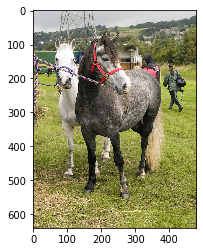

In [5]:
file_id = 4926#4499
df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

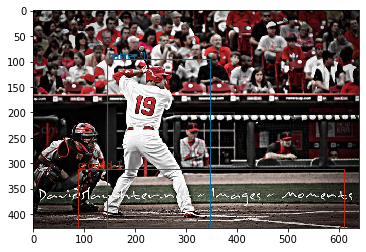

In [198]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
# SHOWING ALL THE BOXED OBJECTS
rng = [i for i in range(len(box_data))]
for i in rng[20:22]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)


['number 19', 'the batter', 'baseball player']


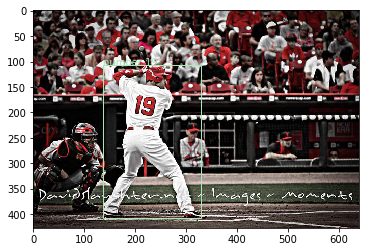

In [212]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [213]:
types = [col[5:] for col in df.columns if 'TYPE_' in col]
attributes = [col[5:] for col in df.columns if 'ATTR_' in col]
objects = [obj for obj in df['box_alias']]
saliences = list(df['salience'])
theta_type = 0.0007
theta_att = 0.0025
beta = 0.5
alpha = 1

In [214]:
print(objects[:10])
print(types[:10])
print(attributes[:10])
print(saliences)

['pants-1', 'catcher-1', 'man-1', 'man-2', 'hat-1', 'number-1', 'lines-1', 'hat-2', 'uniform-1', 'man-3']
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm_clock', 'ceiling_fan', 'photos', 'parrot']
['gray', 'multi colored', 'double decker', 'unmade', 'red', 'camouflage', 'blue', 'white', 'green', 'pink']
[0.10212767124176024, 0.14997652173042295, 0.01706182025372982, 0.017921620979905132, 0.002574110170826316, 0.004597955383360386, 0.09252896159887314, 0.0025905154179781675, 0.08544491976499557, 0.013426614925265312, 0.07026486098766327, 0.3374946713447571, 0.07406847178936005, 0.22484692931175232, 0.27676838636398315, 0.01345160882920027, 0.3183410167694092, 0.2696698009967804, 0.06595220416784286, 0.0025597133208066225, 0.22208255529403687, 0.24303187429904935, 0.002575781894847751, 0.01783798821270466, 0.01813483238220215]


In [86]:
def create_obj_to_attr_types(df, types, attributes):
    obj_to_types = defaultdict(dict)
    for t in types:
        col_type = f'TYPE_{t}'
        type_df = df[['box_alias', col_type]]
        for index, row in type_df.iterrows():
            obj = row.iloc[0]
            prob = row.iloc[1]
            if prob > theta_type:
                obj_to_types[obj][t] = prob
    
    obj_to_attributes = defaultdict(dict)
    for att in attributes:
        col_att = f'ATTR_{att}'
        attr_df = df[['box_alias', col_att]]
        for index, row in attr_df.iterrows():
            obj = row.iloc[0]
            prob = row.iloc[1]
            if prob > theta_att:
                obj_to_attributes[obj][att] = prob
    return obj_to_types, obj_to_attributes

In [292]:
obj_to_types, obj_to_attributes = create_obj_to_attr_types(df, types, attributes)

In [293]:
for obj in obj_to_types:
    print(obj, obj_to_types[obj])


horse-1 {'horse': 0.0016315645771101115}
head-1 {'horse': 0.0007916383910924196, 'head': 0.000956383242737502, 'face': 0.0007139100925996901}
sky-1 {'sky': 0.001358552253805101}
woman-1 {'woman': 0.001351579907350242}
grass-1 {'field': 0.0007611348992213608, 'grass': 0.0010429820977151394}
field-1 {'field': 0.0008183666504919528, 'grass': 0.0009694386390037836}
jacket-1 {'jacket': 0.0009008707711473107, 'coat': 0.0008049388998188077}
coat-1 {'jacket': 0.0009008707711473107, 'coat': 0.0008049388998188077}
head-2 {'head': 0.0008779009222052991, 'bridle': 0.0007584586273878813}
bridle-1 {'head': 0.0007004633080214263, 'face': 0.0007472706492990255, 'bridle': 0.0007909091073088348, 'OOV': 0.0007233886863104999}
rope-1 {'rope': 0.000816440093331039, 'OOV': 0.0008216118440032005}
background-1 {'background': 0.0008794537279754878, 'OOV': 0.0007591529283672571}


In [298]:
def utterancePrior(utts):
    utt=np.full((1,len(utts)),1/len(utts))
    return utt[0]
def objectPrior():
    result=saliences
    return result/np.sum(result)

def meaning(utterance, obj):
    if obj in obj_to_attributes and utterance in obj_to_attributes[obj]:
        return obj_to_attributes[obj][utterance]
    elif obj in obj_to_types and utterance in obj_to_types[obj]:
        return obj_to_types[obj][utterance]
    else:
        return 0
def literal_listener(utt,pri):
    result=[meaning(utt,obj)*p for obj,p in zip(objects,pri)]

    return result/np.sum(result)

def cost(utt):
    result=len(utt.split('_'))
    return result



def speaker(obj, pri, t, curr):
  #print(obj, pri, t, curr)
    if len(t)==0:
        us=utterances
    else:
        us=att4type[t]
    utts=[]
    for c in us:
        if c not in curr:
            utts.append(c)
    if len(utts)>0:
        idx=objects.index(obj)
        prob=[literal_listener(utt, pri)[idx] for utt in utts]
        #print('prob over utterances', utts, prob)
        logvalue=[math.log(p) if p>0 else -2147483647 for p in prob]
        utility=[logv-beta*cost(utt) for logv,utt in zip(logvalue,utts)]
        result=[math.exp(alpha*util) for util in utility]
        #print('result',result)
        if np.sum(result)==0:
            return utts,list(np.zeros(len(result)))
        res=result/np.sum(result)
        return utts,res 
    else:
        return utts,[]

In [299]:
print('speaker')
utterances = types
# print(utterances)
priors=objectPrior()
for obj in objects:
    _,lst=speaker(obj,priors,'',[])
    idx=np.argmax(lst)
    print(obj,utterances[idx],lst[idx])

speaker
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm_clock', 'ceiling_fan', 'photos', 'parrot', 'tail_fin', 'birthday_cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop_sign', 'cone', 'microwave', 'skateboard_ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator', 'ostrich', 'bathtub', 'blinds', 'court', 'urinal', 'knee_pads', 'bed', 'flamingo', 'giraffe', 'helmet', 'giraffes', 'tennis_court', 'motorcycle', 'laptop', 'tea_pot', 'horse', 'television', 'shorts', 'manhole', 'dishwasher', 'jeans', 'sail', 'monitor', 'man', 'shirt', 'car', 'cat', 'garage_door', 'bus', 'radiator', 'tights', 'sailboat', 'racket', 'plate', 'rock_wall', 'beach', 'trolley', 'ocean', 'headboard', 'tea_kettle', 'wetsuit', 'tennis_racket', 'sink', 'train', 'keyboard', 'sky', 'match', 'train_station', 'stereo', 'bats', 'tennis_player', 'toilet_brush', 'lighter', 'pepper_shaker', 'gazebo', 'hair_dryer', 'elephant', 'toilet_seat', 'zebra', 'skateboard', 'zebr

/scratch3/hle/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


head-1 face 0.5185177371968479
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm_clock', 'ceiling_fan', 'photos', 'parrot', 'tail_fin', 'birthday_cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop_sign', 'cone', 'microwave', 'skateboard_ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator', 'ostrich', 'bathtub', 'blinds', 'court', 'urinal', 'knee_pads', 'bed', 'flamingo', 'giraffe', 'helmet', 'giraffes', 'tennis_court', 'motorcycle', 'laptop', 'tea_pot', 'horse', 'television', 'shorts', 'manhole', 'dishwasher', 'jeans', 'sail', 'monitor', 'man', 'shirt', 'car', 'cat', 'garage_door', 'bus', 'radiator', 'tights', 'sailboat', 'racket', 'plate', 'rock_wall', 'beach', 'trolley', 'ocean', 'headboard', 'tea_kettle', 'wetsuit', 'tennis_racket', 'sink', 'train', 'keyboard', 'sky', 'match', 'train_station', 'stereo', 'bats', 'tennis_player', 'toilet_brush', 'lighter', 'pepper_shaker', 'gazebo', 'hair_dryer', 'elephant', 'toilet_seat', 'zebr

coat-1 jacket 0.4945084856945266
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm_clock', 'ceiling_fan', 'photos', 'parrot', 'tail_fin', 'birthday_cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop_sign', 'cone', 'microwave', 'skateboard_ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator', 'ostrich', 'bathtub', 'blinds', 'court', 'urinal', 'knee_pads', 'bed', 'flamingo', 'giraffe', 'helmet', 'giraffes', 'tennis_court', 'motorcycle', 'laptop', 'tea_pot', 'horse', 'television', 'shorts', 'manhole', 'dishwasher', 'jeans', 'sail', 'monitor', 'man', 'shirt', 'car', 'cat', 'garage_door', 'bus', 'radiator', 'tights', 'sailboat', 'racket', 'plate', 'rock_wall', 'beach', 'trolley', 'ocean', 'headboard', 'tea_kettle', 'wetsuit', 'tennis_racket', 'sink', 'train', 'keyboard', 'sky', 'match', 'train_station', 'stereo', 'bats', 'tennis_player', 'toilet_brush', 'lighter', 'pepper_shaker', 'gazebo', 'hair_dryer', 'elephant', 'toilet_seat', 'ze

In [294]:
x = objectPrior()
print(x)
print('adult',literal_listener('adult',x))
print('########')
print(meaning('adult', 'horse-1'))
print(obj_to_attributes['horse-1'])
print(obj_to_attr['horse-1'])
for obj in obj_to_attributes:
    print(obj)

[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
horse-1 0.002502537332475185 0.20566095933275483
adult
defaultdict(<class 'dict'>, {'horse-1': {'horse': 0.0016315645771101115}, 'head-1': {'horse': 0.0007916383910924196, 'head': 0.000956383242737502, 'face': 0.0007139100925996901}, 'sky-1': {'sky': 0.001358552253805101}, 'woman-1': {'woman': 0.001351579907350242}, 'grass-1': {'field': 0.0007611348992213608, 'grass': 0.0010429820977151394}, 'field-1': {'field': 0.0008183666504919528, 'grass': 0.0009694386390037836}, 'jacket-1': {'jacket': 0.0009008707711473107, 'coat': 0.0008049388998188077}, 'coat-1': {'jacket': 0.0009008707711473107, 'coat': 0.0008049388998188077}, 'head-2': {'head': 0.0008779009222052991, 'bridle': 0.0007584586273878813}, 'bridle-1': {'head': 0.00070

In [239]:
print(objectPrior())

[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]


In [234]:
BOUND=2 #0.6730116670092565
BASE=math.e
NON_ZERO=0.0000000000000001

def entropy(p):
    ent=0
    for i in p:
        ent -= i*math.log(i+NON_ZERO,BASE)
    return ent

def full_speaker(obj):
    output = []
    c = objectPrior()
    t=''
    for iter in range(10):
#         print('iteration',iter)
        utts,pro=speaker(obj, c, t, output)
        #print(iter, c)
        if len(utts)>0:
            idx=np.argmax(pro)
#             print("YOYO",utts[idx])
        if pro[idx] <=0:
            new_c=c
        else:
            u=utts[idx]
            new_c=literal_listener(u,c)
            output.append(u)
        ent=entropy(new_c)
#         print(iter,'new_c',new_c)
#         print(iter,'ent',ent)
        c=new_c
        t=output[0]
        if ent <= BOUND:
            break


    return output

def create_exp(utts):
    result=''
    for i in range(len(utts)-1,-1,-1):
        result=result+' '+utts[i]
    return result[1:]


In [268]:
print('full speaker')
exps=[]
expression=create_exp(full_speaker(objects[0]))
exps.append(expression)
print(exps)

full speaker
1601 adult
0 horse-1
1601
[(42, 0.9363234892116528), (72, 0.0), (90, 0.0), (100, 0.0), (109, 0.0), (181, 0.0), (191, 0.0), (222, 0.0), (327, 0.0), (380, 0.0), (573, 0.0), (919, 0.0), (956, 0.0), (1350, 0.0), (1375, 0.0), (1408, 0.0), (1508, 0.0), (1600, 0.0)]
['horse']


/scratch3/hle/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [249]:
exps

['horse']

In [99]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)

In [250]:
exps = []
references = []
for i in [4926]:
    df = pd.read_csv(f'/scratch3/hle/refCOCO/attr_tables/attr_{i}.tsv', encoding='utf-8',sep='\t')
    with open(f'/scratch3/hle/refCOCO/labels/lab_{i}.json') as json_file:
        label = json.load(json_file)
    refs = [[r] for r in label['ref_sents']]
    references.append(refs)
    types = [col[5:] for col in df.columns if 'TYPE_' in col]
    attributes = [col[5:] for col in df.columns if 'ATTR_' in col]
    objects = [obj for obj in df['box_alias']]
    saliences = list(df['salience'])
    obj_to_types, obj_to_attr = create_obj_to_attr_types(df, types, attributes)
    targets = [matched_label[i][j][1] for j in range(3)]
    word_lists = [full_speaker(target) for target in targets]
    expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]
    exps.append(expression)

0 horse-1
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605


/scratch3/hle/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


0 0.20566095933275483
0.0025180357042700052 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0.0025020833127200603 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775

0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682

0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.0082841

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.020778

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.249656

0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.1266485

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336

0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.205660

0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.0082841

0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.205660

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.0076544

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.1266485

0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.249656

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0.000956383242737502 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0.0008779009222052991 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0.0007004633080214263 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035

0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.0207786

0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566

0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566

0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.249656

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.0082841

0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566

0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.0082841

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124

0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188

 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0.002512464299798012 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.028825882824196326
0 0.008124546949602816
0 0.12664855775661282
0 0.038109110037702315
0 0.2496568202148987
0 0.007654407924829272
0 0.008284109854561763
0 0.033336419309716064
[0.20566096 0.04818841 0.02077867 0.22473211 0.02882588 0.00812455
 0.12664856 0.03810911 0.24965682 0.00765441 0.00828411 0.03333642]
0 0.20566095933275483
0 0.048188406638610605
0 0.02077867364035038
0 0.22473210551616404
0 0.0288258828

In [252]:
print(exps)

[['horse', 'field', 'short']]


In [150]:
diff = []
for i in range(5000):
    top_k = matched_label[i]
    if len(top_k) < 3:
        diff.append(i)

In [152]:
print(diff)
print(matched_label[3468])
print(matched_label[4499])

[3468, 4499]
[[0, 'bananas-1', 0.0], [1, 'wall-1', 0.0]]
[[0, 'tree-1', 0.0]]


In [182]:
print(exps)
print(references)

[['horse', 'field', 'short']]
[[['grey'], ['grey horse'], ['gray horse']]]


In [306]:
df['ATTR_cake']

0     0.002493
1     0.002493
2     0.002493
3     0.002493
4     0.002492
5     0.002493
6     0.002493
7     0.002493
8     0.002493
9     0.002491
10    0.002493
11    0.002492
Name: ATTR_cake, dtype: float64

In [303]:
type_and_attr = np.intersect1d(types, attributes)
print(len(type_and_attr))

82


In [307]:
print(attributes_for_types)

NameError: name 'attributes_for_types' is not defined

In [310]:
np.intersect1d(types, attributes)

array(['adult', 'apple', 'asphalt', 'baby', 'back', 'baseball',
       'bathroom', 'black', 'brick', 'bunch', 'cake', 'cardboard',
       'cargo', 'cement', 'cheese', 'chocolate', 'clay', 'clock',
       'coffee', 'computer', 'concrete', 'dirt', 'door', 'dress', 'fruit',
       'glass', 'grass', 'gravel', 'half', 'herd', 'home', 'laptop',
       'letter', 'license', 'male', 'mesh', 'mountain', 'night', 'number',
       'ocean', 'orange', 'palm', 'paper', 'park', 'pile', 'plain',
       'plastic', 'police', 'railroad', 'rock', 'roll', 'salt', 'sand',
       'short', 'ski', 'slice', 'soap', 'soda', 'stack', 'statue',
       'stone', 'stop', 'straw', 'street', 'stripes', 'surfing',
       'telephone', 'tennis', 'tile', 'toilet', 'tomato', 'traffic',
       'train', 'triangle', 'water', 'wii', 'windshield', 'wine', 'wire',
       'wood', 'wrist', 'yellow'], dtype='<U20')